In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pdb
import pickle
from scipy import stats
import math
import seaborn as sns
import os
import pylab
from ipywidgets import interact
from IPython.core.display import display, HTML
import winsound

In [2]:
os.chdir("D:/Worms_Life_Sim/")
import vectorized_RG as RG

### Debugging
pdb.set_trace() debugging mode will be entered when a worm has negative energy
1. "n" ENTER runs the next line in the program
2. "q" ENTER quits/crashes the program
3. "p" (variable) ENTER prints out the variable
4. "c" ENTER continues running the program

[Debugging in Python](https://pythonconquerstheuniverse.wordpress.com/2009/09/10/debugging-in-python/)

### Code Timer
%load_ext line_profiler

%lprun -f run run(1)

In [3]:
exp = 5
vers = 25
run = 3
para = "food_repop"
combination_graph = True

define which experiment to study and the parameter varied

In [4]:
os.chdir("D:/Worms_Life_Sim/experiments/exp_" + str(exp) + "_version_" + str(vers) + "_run_" + str(run) + "/")

set the working directory

In [5]:
time_saved = [int(file.split("_")[-1].split(".")[0]) for file in os.listdir() if file.split("_")[0] == "all"]
time_saved.sort()
print(time_saved)

[1, 250, 500, 1000, 1500, 2000, 5000, 10000, 15000, 20000, 25000, 30000]


discover which time points got saved by looking at the file names

In [6]:
my_data = [RG.open_pickle(i) for i in time_saved]

In [7]:
RG.which_gen(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["par"])

This is generation number 171


In [8]:
def worm_map(time=1):
    RG.worm_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"], map_type="dauer")

interact(worm_map, time=(1,len(time_saved)-1));

interactive(children=(IntSlider(value=1, description='time', max=11, min=1), Output()), _dom_classes=('widget-…

In [9]:
def gender_map(time=0):
    RG.gender_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(gender_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

male data is translucent and on top, so covers over female data a bit in those locations

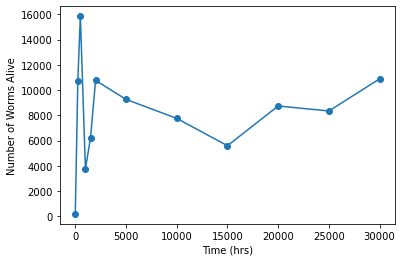

In [10]:
RG.worms_alive(time_saved, my_data)

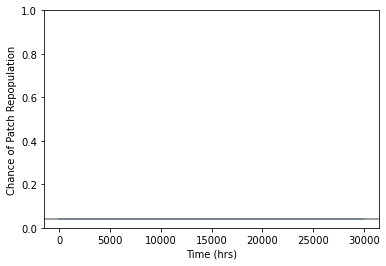

In [11]:
RG.patch_repop(my_data[-1]["par"])

In [12]:
def food_map(time=0):
    RG.food_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(food_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [13]:
def num_gender(time=0):
    RG.num_gender(my_data[time]["par"], my_data[time]["g_to_i"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_gender, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [14]:
def num_stage(time=0):
    RG.num_stage(my_data[time]["i_to_s"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_stage, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

chance of dying in each stage
L1 : 0.6584031664957578
L2 : 0.14559590525382893
L2d : 0.2062811906805624
L3 : 0.15353207806194302
dauer : 0.9800549279860563
L4 : 0.2005602480918676
adult : 0.8621863983027455


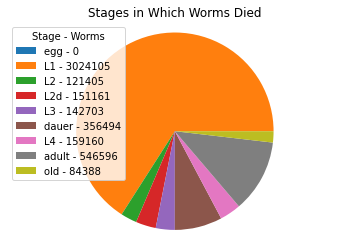

In [15]:
display(HTML("<style>div.output_scroll { height: 30em; }</style>"))
RG.frac_dead(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Average Time Spent Per Stage (hrs)
L1 10.995
L2 10.01
L2d 15.777
L3 10.031
dauer 2827.025
L4 13.259
adult 88.257
old 117.552


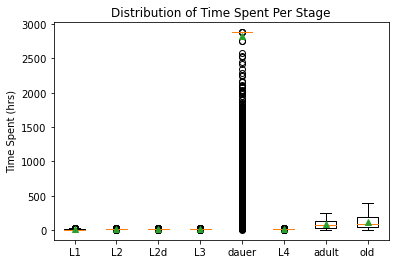

In [16]:
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
L2d_avg = RG.stage_time(my_data[-1]["stage_list"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

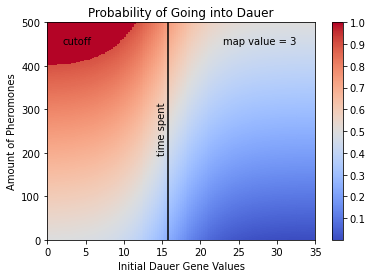

In [17]:
RG.prob_dauer(my_data[-1]["par"], L2d_avg)

In [18]:
def stats_d(time=0):
    RG.stats_d(my_data[time]["p_to_i"], my_data[time]["array"], my_data[time]["par"], L2d_avg)

interact(stats_d, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [19]:
def stats_s(time=0):
    RG.stats_s(my_data[time]["p_to_i"], my_data[time]["array"])

interact(stats_s, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

x axis limits include travel direction genes from 0.25 - 0.75

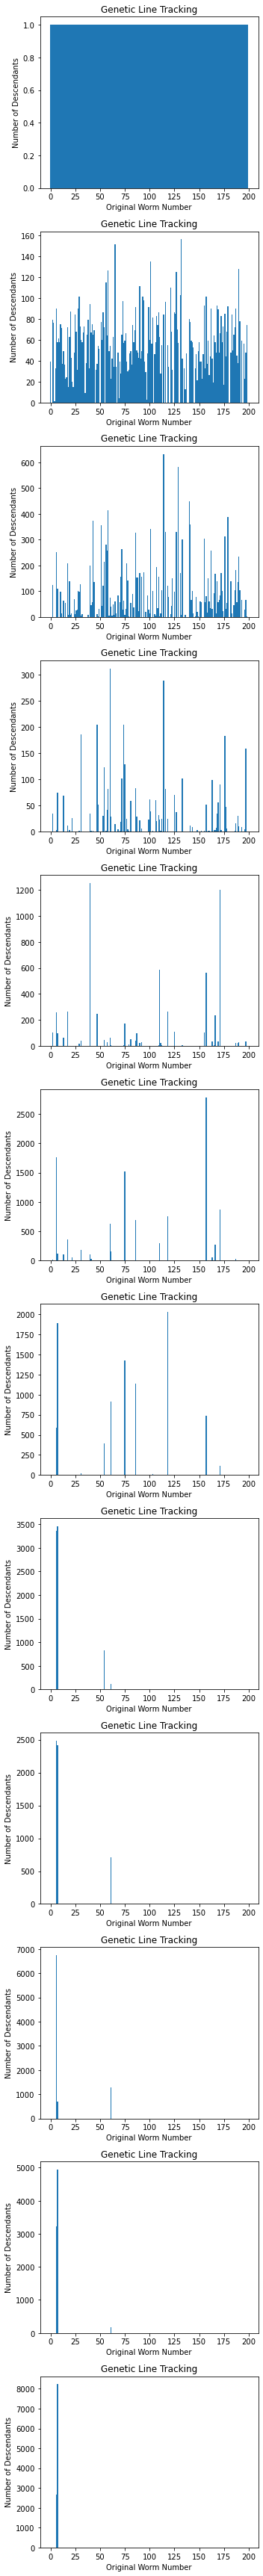

In [20]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.stats_g(my_data[i]["par"], my_data[i]["p_to_i"], my_data[i]["array"])
plt.tight_layout()

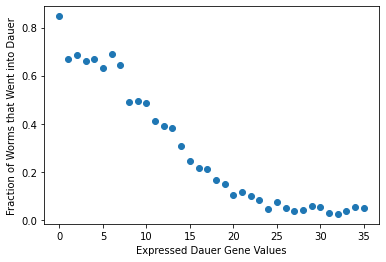

In [21]:
RG.frac_dauer(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

fraction of worms that went into dauer = the number of worms that went into dauer / the total number of worms that went into either L3 or dauer

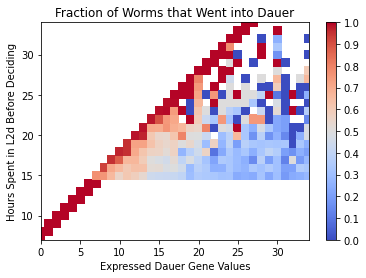

In [22]:
RG.frac_dauer_map(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

- only includes worms that made it through L2d and not ones that went through L2
- white spaces indicate there are no worms with that combination

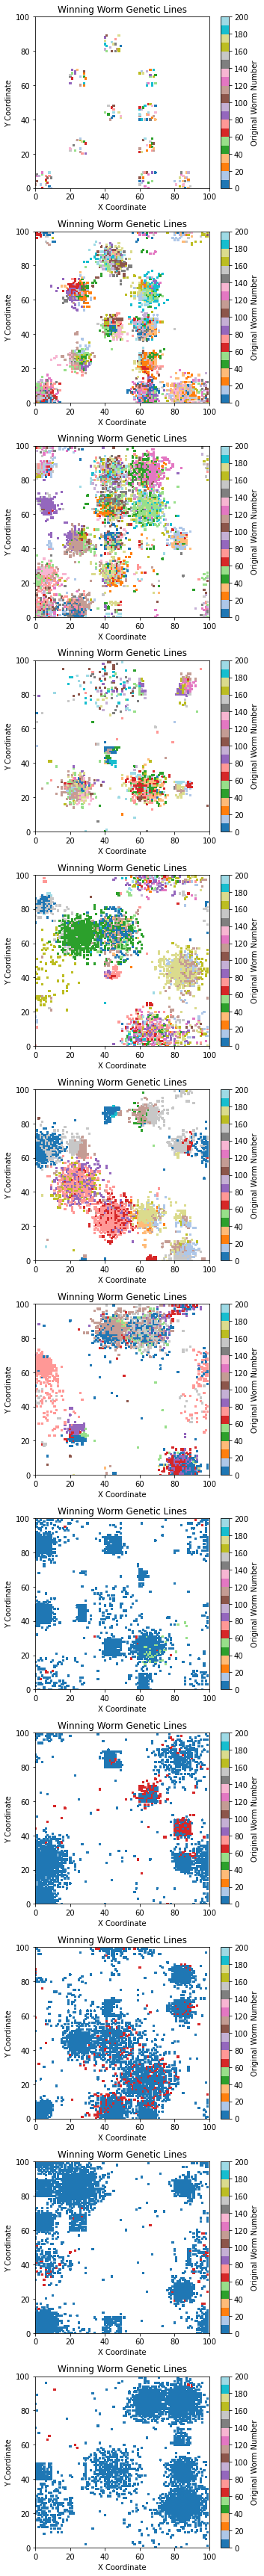

In [23]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.genetic_line_map(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

In [24]:
def dauer_line(time=0):
    RG.dauer_line(my_data[time]["array"], my_data[time]["p_to_i"], my_data[time]["s_to_i"], my_data[time]["par"])

interact(dauer_line, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

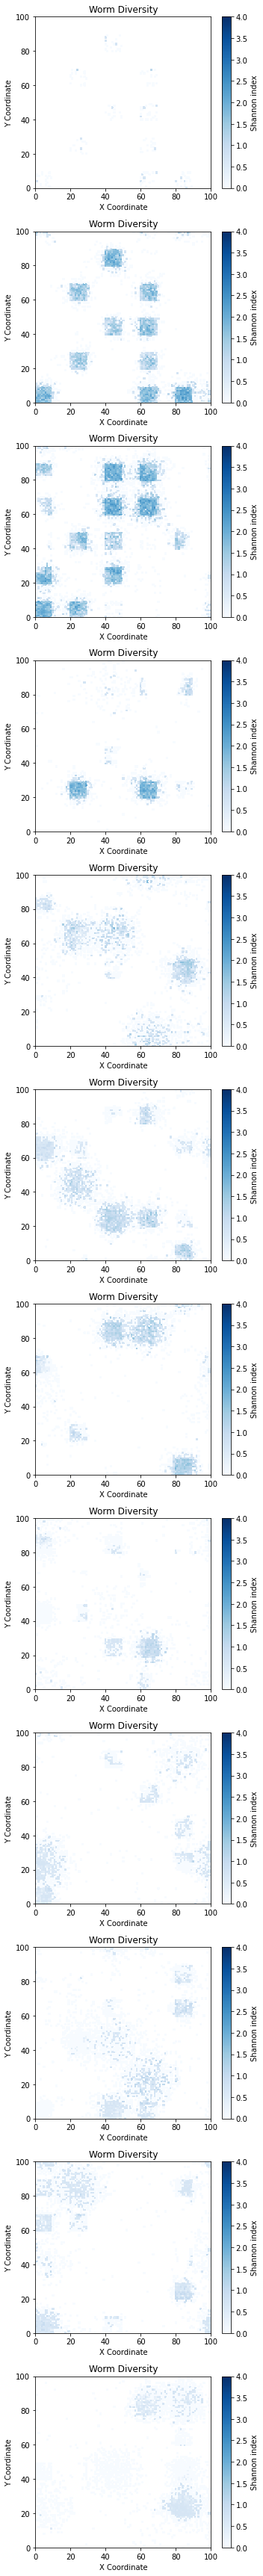

In [25]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.diversity(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

the limit of Shannon index values is from 0 to 4

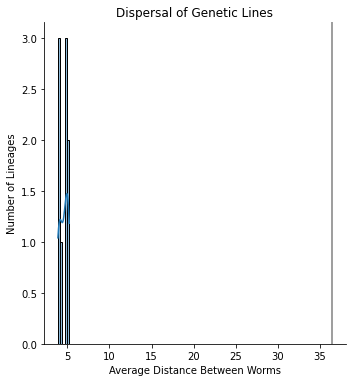

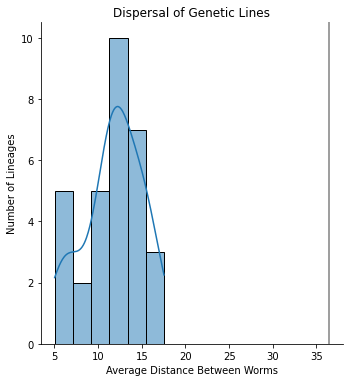

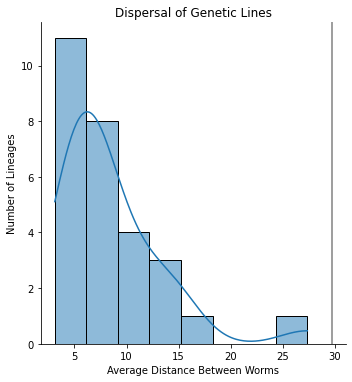

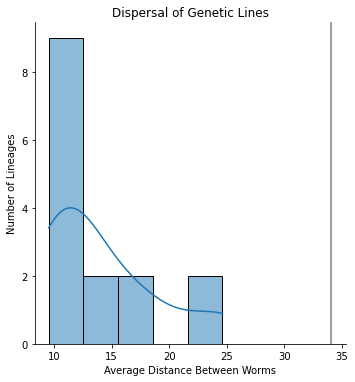

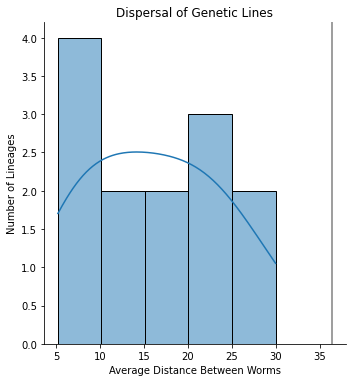

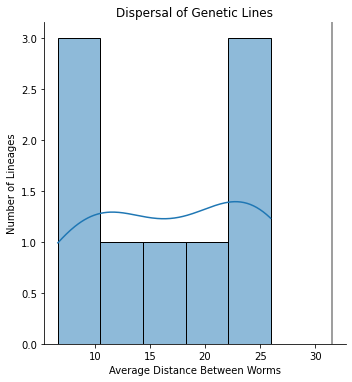

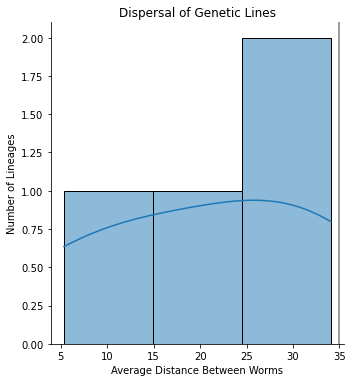

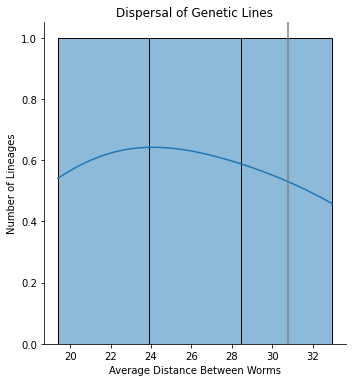

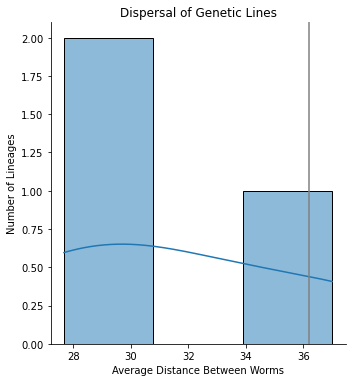

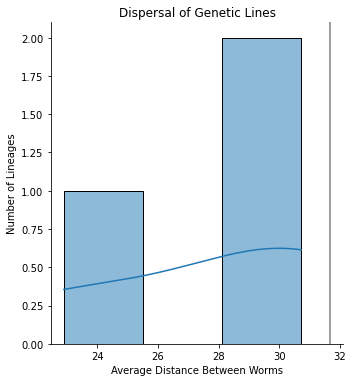

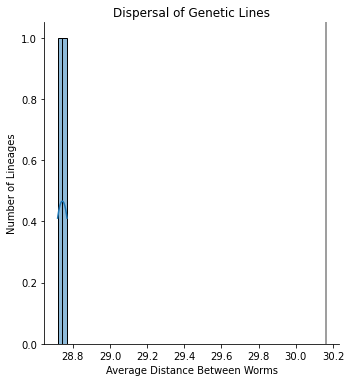

In [26]:
for i in range(1,len(time_saved)):
    RG.clump(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])

clumpiness of each lineage with more than 1% of living worms vs. clumpiness of a random sample of the population

In [27]:
RG.winner(time_saved, my_data)

    Time (hrs)  Winning Line  Avg Dauer Gene  Std Dev  Frac of Pop
0            1             0           4.156    0.000        0.005
1          250           132          23.246    6.227        0.015
2          500           114          25.672    7.380        0.040
3         1000            60          23.050    0.000        0.083
4         1500            40          31.994    0.156        0.202
5         2000           157          29.096    8.088        0.259
6         5000           118          30.265    0.012        0.219
7        10000             7          20.973    0.112        0.445
8        15000             6          12.797    0.246        0.443
9        20000             6          12.785    0.136        0.771
10       25000             7          20.951    0.063        0.591
11       30000             7          20.952    0.112        0.755


"Avg Dauer Gene" and "Std Dev" are only measuring the genetics of the winning line

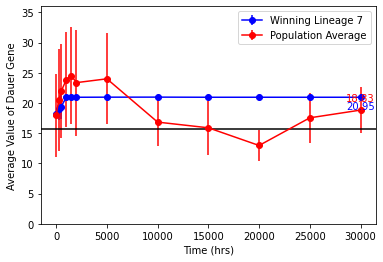

In [28]:
RG.dauer_over_time(my_data[-1]["par"], L2d_avg, time_saved, my_data)

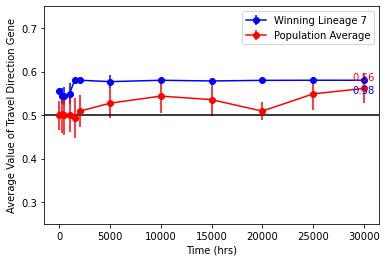

In [29]:
RG.smell_over_time(time_saved, my_data)

y axis limits include travel direction genes from 0.25 - 0.75

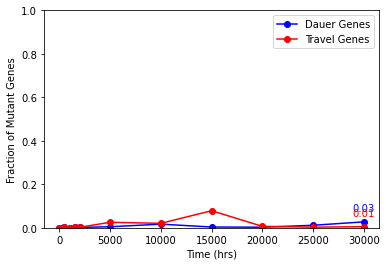

In [30]:
RG.mutation(time_saved, my_data)

- fraction of mutant genes = the number of genes NOT in the original population / the total number of genes
- only look at the genes of living worms

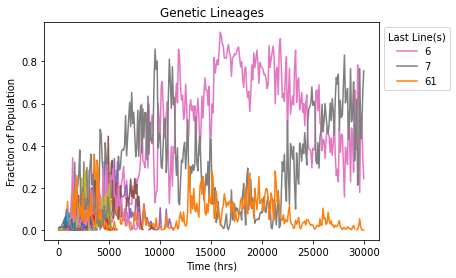

In [31]:
RG.line_track(my_data[-1]["par"])

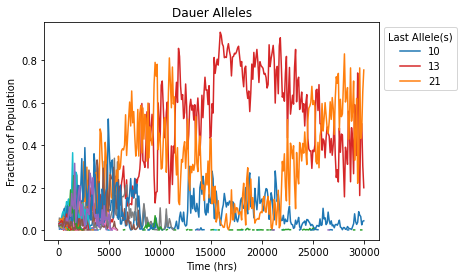

In [32]:
RG.allele_track(my_data[-1]["par"])

- allele values are rounded to the nearest whole number so they can be sufficiently grouped
- all negative numbers will be changed to zero

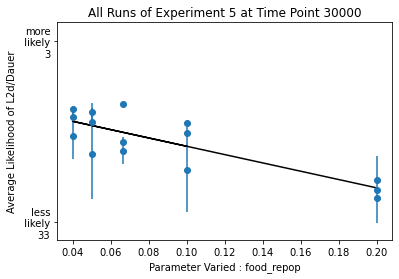

In [33]:
if combination_graph:
    RG.combine_results(exp, para, time_saved[-1])

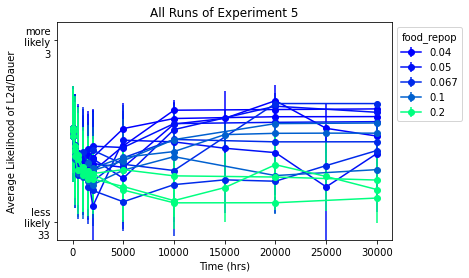

In [34]:
if combination_graph:
    RG.combine_results_over_time(exp, para)

In [35]:
winsound.Beep(1800,500)